In [1]:
import re
import os
import json

from collections import Counter
from itertools import combinations

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

1. Гистограмма внешних хорд объекта внутри сферического описывающего объема для самой модели и для выпуклой оболочки модели ("model_bounding_sphere_strict_outer" и "hull_bounding_sphere_strict_outer").


2. Гистограмма внешних хорд объекта внутри сферического описывающего, нормированная относительно общего числа хорд, объема для самой модели и для выпуклой оболочки модели ("model_bounding_sphere_strict_outer_absolute" и "hull_bounding_sphere_strict_outer_absolute").


3. Гистограмма внешних хорд объекта внутри сферического описывающего объема для самой модели и для выпуклой оболочки модели ("model_bounding_sphere_missed" и "hull_bounding_sphere_missed").


4. Гистограмма распределения пересечений хорд по концентрическим сферам ("model_bounding_sphere_concentric_sphere" и "hull_bounding_sphere_concentric_sphere")

In [2]:
models = pd.read_csv('data/models.csv')
models.head()

,name,type
0,b5025746-e58f-4696-837c-5b21808b7ae9,Torus
1,30a730ca-c466-4e8c-b00b-bf7b317495e2,Cone
2,7d0c7362-1e8d-4008-b444-cdf111e06ce9,Sphere
3,d58d68a4-7acb-48d8-96bd-71f1eca1affe,Sphere
4,df907d43-7c4f-4ccd-9350-0d84c41dba54,Cube


In [3]:
def histogram_exist(model_name):
    return os.path.isfile(f"data/histograms/{model_name}.json")
    
def torus_clean(model_type):
    return re.sub(r'(Torus).*', '\g<1>', model_type)

In [4]:
# оставим только те модели, для которых посчитаны гистограммы
# и почистим типы
models = models[models.name.apply(histogram_exist)]
models.type = models.type.apply(torus_clean)
models.reset_index(drop=True, inplace=True)
models.type.value_counts()

Sphere      477
Torus       428
Cone        424
Cylinder    414
Cube        394
Name: type, dtype: int64

In [5]:
def get_histogram(model_name, intervals=32):
    with open(f"data/histograms/{model_name}.json", "r") as file:
        data = json.load(file)
    res_histogram = dict()
    for histogram in data['histogram_data']:
        if histogram['intervals'] == intervals:
            res_histogram[histogram['type']] = histogram['data']
    return res_histogram

In [6]:
histograms = pd.DataFrame(list(models.name.apply(get_histogram)))

In [7]:
models_data = pd.concat([models, histograms], axis=1)

label_encoder = LabelEncoder()
models_data.type = label_encoder.fit_transform(models_data.type)
models_data.head()

,name,type,model_bounding_sphere_strict_outer,model_bounding_sphere_strict_outer_absolute,model_bounding_sphere_missed,model_bounding_sphere_concentric_sphere,hull_bounding_sphere_strict_outer,hull_bounding_sphere_strict_outer_absolute,hull_bounding_sphere_missed,hull_bounding_sphere_concentric_sphere
0,30a730ca-c466-4e8c-b00b-bf7b317495e2,0,"[8.968486119543021e-05, 0.003136210607649429, ...","[1.791758023354601e-05, 0.0006265639980130782,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0063094177602049...","[0.0010679397317732767, 0.003656382802582924, ...","[1.6473469477406637e-05, 0.0005271510232770124...","[1.6539304830965549e-06, 5.2925775459089756e-0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0056123793473264...","[0, 0.0072510721483051545, 0.01214643816134116..."
1,1b220e0b-d7fa-40a0-8cfd-930a3228c668,3,"[0.0012413227249569968, 0.037017280416308536, ...","[0.0006138838643093379, 0.018306529552154217, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0099887220587369...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0012413227249569968, 0.03701672301948548, 0...","[0.0006138838643093379, 0.0183062538970737, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0099887220587369...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,347130e7-e4ad-4714-a322-dadd515433f7,4,"[0.0017943360086115465, 0.04350334805527853, 0...","[0.0006249100675299816, 0.01515083019040599, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0077443575313136...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0073079...","[0.0014671050077011687, 0.0355696923415436, 0....","[0.0006249100675299816, 0.01515083019040599, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0087923084827769...","[0, 0, 0, 0, 0, 0, 0.008846636724867657, 0.017..."
3,1346fe51-b6f1-4036-a2c4-cdf84abf6c85,0,"[1.4641538532869035e-05, 0.002703804115736482,...","[3.3078609661931097e-06, 0.0006108516584236609...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0065217639031727...","[0, 0, 0, 0, 0.009186345301164247, 0.012686893...","[1.7986859314495097e-05, 0.0007181895969144827...","[3.859171127225295e-06, 0.0001540911900084957,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0064280740765697...","[0, 0.0034200728210847103, 0.00568898664604173..."
4,1715abb8-f4e4-4eb3-a030-6c5b0083f1f0,2,"[6.890738526920353e-05, 0.0040503120062305095,...","[2.370633692438395e-05, 0.0013934364320088474,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0076951846264398...","[0, 0, 0.006490915442625788, 0.010017210821343...","[6.890738526920353e-05, 0.0040503120062305095,...","[2.370633692438395e-05, 0.0013934364320088474,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0076951846264398...","[0, 0, 0.006490915442625788, 0.010017210821343..."


In [8]:
# попробуем сначала взять все гистограммы
X = models_data.drop(['name', 'type'], axis=1)
X = np.apply_along_axis(np.hstack, 1, X)
y = models_data.type.values

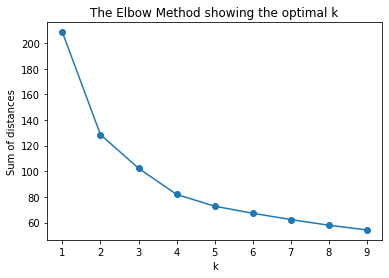

In [9]:
# 4-5 кластера выглядит как оптимальный выбор, это здорово
K = range(1, 10)
clfs = [KMeans(n_clusters=k, random_state=42).fit(X) for k in K]
dist = [clf.inertia_ for clf in clfs]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
def get_accuracy(X, y_true):
    clf = KMeans(n_clusters=5, random_state=42)
    clf.fit(X)
    y_pred = np.zeros_like(y_true)
    for label in np.unique(clf.labels_):
        mask = clf.labels_ == label
        y_pred[mask] = Counter(y_true[mask]).most_common(1)[0][0]
    
    return accuracy_score(y_true, y_pred)

In [11]:
get_accuracy(X, y)

0.31867103416003745

In [12]:
y = models_data.type.values
res_accuracy = 0
res_labels = []
for number_of_labels in range(2, 9):
    for labels in list(combinations(models_data.keys()[2:], number_of_labels)):
        labels = list(labels)
        X = models_data[labels]
        X = np.apply_along_axis(np.hstack, 1, X)
        cur_accuracy = get_accuracy(X, y)
        if cur_accuracy > res_accuracy:
            res_accuracy = cur_accuracy
            res_labels = labels

In [13]:
# выглядиит плохо, но мы перебрали все возможные фичи
# может нужно фича инженирить?
print(res_labels, res_accuracy)

['model_bounding_sphere_missed', 'hull_bounding_sphere_missed'] 0.37248479176415533
